# Portfolio Optimizer
Simulate and optimize a stock portfolio using Python, yfinance, and portfolio theory.
8 stocks were chosen with the aim of scoping a number of diverse sectors.
The stocks chosen were:
- AAPL - Apple (Technology)
- JPM - JP Morgan Chase & Co (Financials)
- XOM - Exxon Mobil Corporation (Energy)
- JNJ - Johnson & Johnson (Healthcare)
- TSLA - Tesla Inc. (Consumer Discretionary)
- NVDA - NVIDIA Corporation (Technology)
- WMT - Walmart Inc. (Consumer Staples)
- BA - The Boeing Company (Industrials)

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import minimize


In [4]:
#Choosing stocks from diverse sectors
tickers = ["AAPL", "JPM", "XOM", "JNJ", "TSLA", "NVDA", "WMT", "BA"]

#Downloading historical data from Jan 1st 2022 to Dec 31st 2023
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)
data = yf.download(tickers, start_date, end_date)
data = data.dropna() #drops rows with any missing data
data.head()

C:\Users\Leann\AppData\Local\Temp\ipykernel_41696\1719562300.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start_date, end_date)
[*********************100%***********************]  8 of 8 completed


Price            Close                                                 \
Ticker            AAPL          BA         JNJ         JPM       NVDA   
Date                                                                    
2022-01-03  178.443130  207.860001  153.545609  146.291046  30.066132   
2022-01-04  176.178436  213.630005  153.133835  151.836899  29.236649   
2022-01-05  171.492111  213.070007  154.154251  149.060989  27.553719   
2022-01-06  168.629303  211.339996  153.626175  150.644608  28.126673   
2022-01-07  168.795975  215.500000  155.702820  152.137238  27.197369   

Price                                               High              ...  \
Ticker            TSLA        WMT        XOM        AAPL          BA  ...   
Date                                                                  ...   
2022-01-03  399.926666  45.858707  55.607395  179.296091  210.550003  ...   
2022-01-04  383.196655  45.018570  57.699017  179.354948  214.559998  ...   
2022-01-05  362.706665  45.627270  58.416641  176.639228  218.929993  ...   
2022-01-06  354.899994  45.500454  59.790638  171.864636  216.000000  ...   
2022-01-07  342.320007  45.934784  60.280720  170.727370  218.320007  ...   

Price            Open                Volume                               \
Ticker            WMT        XOM       AAPL        BA      JNJ       JPM   
Date                                                                       
2022-01-03  45.652636  53.594538  104487900   9060200  6012200  13120900   
2022-01-04  45.665316  56.123734   99310400  11414600  6748400  20195800   
2022-01-05  45.288049  58.197852   94537600  11564700  7016100  17539400   
2022-01-06  45.532157  59.510588   96904000   7142200  7301600  14047500   
2022-01-07  45.494109  59.965663   86709100   9526400  6986000  13913300   

Price                                                 
Ticker           NVDA       TSLA       WMT       XOM  
Date                                                  
2022-01-03  391547000  103931400  20706600  24282400  
2022-01-04  527154000  100248300  33930000  38584000  
2022-01-05  498064000   80119800  35418000  34033300  
2022-01-06  454186000   90336600  21828900  30668500  
2022-01-07  409939000   84164700  19723500  23985400  

[5 rows x 40 columns]

<Figure size 1500x1500 with 0 Axes>

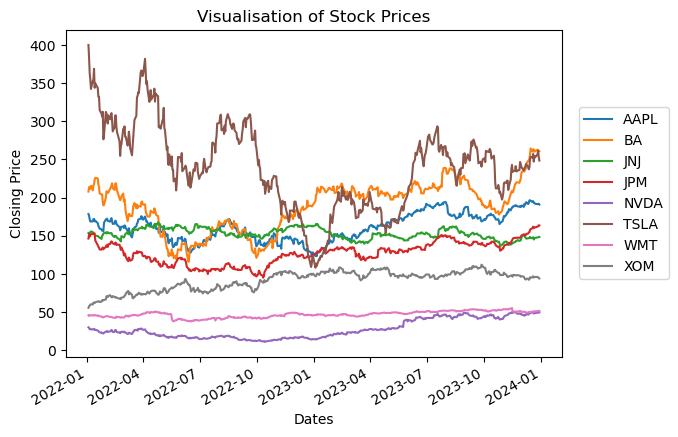

In [39]:
#Visualizing ticker returns
plt.figure(figsize=(15,15))
data['Close'].plot()
plt.legend(loc = 'center left', #anchor point is left center of legend box
           bbox_to_anchor = (1.02, 0.5))
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.title('Visualisation of Stock Prices')
plt.savefig('Stock_prices_plot.png')
plt.show()

This plot illustrates the closing prices of the selected stocks over the two-year period from January 2022 to December 2023:

- TSLA (Tesla) shows the most significant volatility with large price swings including a major dip around early 2023 followed by a swift recovery.

- BA (Boeing) and AAPL (Apple) also show noticeable but less extreme fluctuations than Tesla.

- Alternatively, stocks such as WMT (Walmart), NVDA (Nvidia) and XOM (ExxonMobil) appear more stable with relatively smaller price changes.

The visualization provides an initial intuitive understanding of the individual stock behaviour before building a portfolio.

In [40]:
#Calculating Daily Returns
daily_returns = data['Close'].pct_change().dropna()
daily_returns.head()

Ticker,AAPL,BA,JNJ,JPM,NVDA,TSLA,WMT,XOM
Date,,,,,,,,
2022-01-04,-0.012691,0.027759,-0.002682,0.037910,-0.027589,-0.041833,-0.018320,0.037614
2022-01-05,-0.026600,-0.002621,0.006664,-0.018282,-0.057562,-0.053471,0.013521,0.012437
2022-01-06,-0.016694,-0.008119,-0.003426,0.010624,0.020794,-0.021523,-0.002779,0.023521
2022-01-07,0.000988,0.019684,0.013518,0.009908,-0.033040,-0.035447,0.009546,0.008197
2022-01-10,0.000116,-0.028724,-0.004944,0.000957,0.005615,0.030342,-0.001932,-0.005952


In [57]:
#Calculating Mean Returns and Covariance Matrix
mean_daily_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

trading_days = 252  # typical number of trading days in a year

annual_mean_returns = mean_daily_returns * trading_days
annual_cov_matrix = cov_matrix * trading_days

print("Annualized Returns sample:", annual_mean_returns.head())
print("Annualized Covariance matrix sample:\n", annual_cov_matrix)


Annualized Returns sample: Ticker
AAPL    0.076163
BA      0.187280
JNJ    -0.002980
JPM     0.088933
NVDA    0.408582
dtype: float64
Annualized Covariance matrix sample:
 Ticker      AAPL        BA       JNJ       JPM      NVDA      TSLA       WMT  \
Ticker                                                                         
AAPL    0.084539  0.052004  0.013359  0.035456  0.109141  0.101051  0.018932   
BA      0.052004  0.146095  0.008485  0.044320  0.104584  0.084459  0.013920   
JNJ     0.013359  0.008485  0.028857  0.012680  0.006235  0.006419  0.010762   
JPM     0.035456  0.044320  0.012680  0.066110  0.062608  0.052107  0.011421   
NVDA    0.109141  0.104584  0.006235  0.062608  0.320400  0.197160  0.020312   
TSLA    0.101051  0.084459  0.006419  0.052107  0.197160  0.362079  0.022277   
WMT     0.018932  0.013920  0.010762  0.011421  0.020312  0.022277  0.047982   
XOM     0.019688  0.027195  0.005512  0.023719  0.019679  0.017800  0.011073   

Ticker       XOM  
Ticker  

In [58]:
#Defining portfolio performance function which will calculate expected return, volatility and Sharpe Ratio
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate=0.0):
    returns = np.dot(weights, mean_returns)                                        # weighted average of all individual stock returns
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))           # accounts for diversification benefits because assets interact i.e. are correlated
    sharpe = (returns - risk_free_rate) / volatility                               # return per unit of risk - aim to maximize this
    return returns, volatility, sharpe

In [59]:
#Defining portfolio simulation function
def simulate_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate=0.0):
    results = {'Returns':[], 'Volatility':[], 'Sharpe' :[], 'Weights' :[]}       # building a dictionary
    num_assets = len(mean_returns)

    for i in range(num_portfolios):
        weights = np.random.random(num_assets)                                   # generates array of numbers between 0 and 1
        weights /= np.sum(weights)                                               # normalizes weights
        ret, vol, sharpe = portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)
        
        results['Returns'].append(ret)
        results['Volatility'].append(vol)
        results['Sharpe'].append(sharpe)
        results['Weights'].append(weights)
    
    return pd.DataFrame(results)                                                 # converts results dictionary to a DataFrame

In [ ]:
#Defining a function to plot the Efficient Frontier
def plot_efficient_frontier(df):
    plt.figure(figsize=(10,6))
    scatter = plt.scatter(df['Volatility'], df['Returns'], c=df['Sharpe'], cmap='viridis', s=10) #sets colour gradient using Sharpe value (darker = lower value)
    plt.colorbar(scatter, label='Sharpe Ratio')
    plt.xlabel('Volatility (Risk)')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier')
    
    #adding actual efficient frontier line
    target_returns = np.linspace(df['Returns'].min(), df['Returns'].max(), 100)
    efficient_vols = []

    for r in target_returns:
        constraints = ({'type': 'eq', 'fun' : lambda w: np.sum(w) - 1},
                       {'type': 'eq', 'fun' : lambda w: portfolio_performance(w, annual_mean_returns, annual_cov_matrix)[0] - r})#
        bounds = tuple((0,1) for i in range(len(annual_mean_returns)))
        result = minimize(
            lambda w: portfolio_performance(w, annual_mean_returns, annual_cov_matrix)[1],
            x0 = np.full(len(annual_mean_returns), 1/len(annual_mean_returns)),
            method = 'SLSQP',
            bounds=bounds,
            constraints=constraints
                         
        )
        efficient_vols.append(result.fun)
    plt.plot(efficient_vols, target_returns, color='red', linewidth=2, label='Efficient Frontier')
    plt.legend()
    plt.grid(True)
    plt.savefig('Efficient_Frontier_Plot.png')
    plt.show()

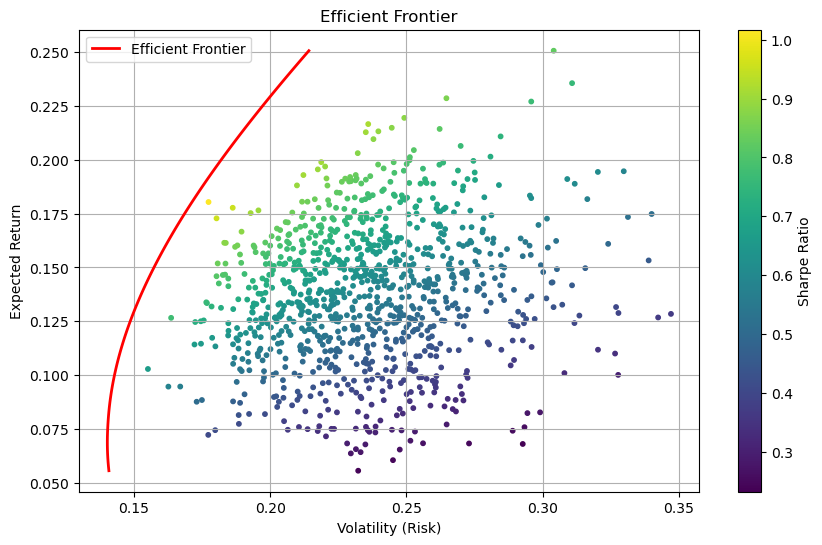

In [ ]:
#Implementing portfolio simulation and plotting the Efficient Frontier
simulated_portfolios = simulate_portfolios(1000, annual_mean_returns, annual_cov_matrix)
simulated_portfolios
plot_efficient_frontier(simulated_portfolios)


This scatter plot shows 1000 simulated portfolios on the chosen stocks, with Volatility (Risk) on the x-axis and Expected Return on the y-axis.

Points are colour-coded by Sharpe Ratio which indicated the risk-adjusted return.

The Efficient Frontier (red line) is the set of optimal portfolios that offer the best trade-offs between risk and return

The simulated points are quite spread out, which is normal given the random assignment of the portfolio weights.



In [62]:
#Finding optimal portfolios using scipy.optimize
def max_sharpe_portfolio(mean_returns, cov_matrix, risk_free_rate=0.0):
    num_assets = len(mean_returns)
    def neg_sharpe(weights):
        return -portfolio_performance(weights, annual_mean_returns, annual_cov_matrix, risk_free_rate=0.0)[2] # negating Sharpe ratio so optimizer minimizes it
    
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})                                 # enforces that weights add up to 1 ('type': 'eq' means function must return exactly zero for constraint to be satisfied)
    bounds = tuple((0, 1) for i in range(num_assets))                                              # restricts each weight to between 0 and 1
    result = minimize(neg_sharpe, num_assets * [1. / num_assets], method = 'SLSQP', bounds=bounds, constraints=constraints)  #starts with equal weights of assets and uses Sequential Least Square Programming (good for constrained nonlinear problems)
    return result


def min_volatility_portfolio(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    def portfolio_volatility(weights):
        return portfolio_performance(weights, annual_mean_returns, annual_cov_matrix)[1]
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for i in range(num_assets))
    result = minimize(portfolio_volatility, num_assets*[1./num_assets], method = 'SLSQP', bounds=bounds, constraints=constraints)
    return result

In [63]:
#Defining a function to clearly display key results from the optimizing functions
def display_optimal_portfolio(sharpe_result, vol_result, tickers):
    weights_sharpe = sharpe_result.x
    print('Optimal Portfolio Weights (Max Sharpe):\n')
    for ticker, weight in zip(tickers, weights_sharpe):
        print(f'{ticker}: {weight: .2%}')
    print('\nMaximum Sharpe Ratio:', -sharpe_result.fun)
    print('\n')
    weights_vol = vol_result.x
    print('Optimal Portfolio Weights (Min Volatility):\n')
    for ticker, weight in zip(tickers, weights_vol):
        print(f'{ticker}: {weight: .2%}')
    print('\nMinimum Volatility:', vol_result.fun)

In [64]:
#Defining a function to plot optimal weights
def plot_optimal_weights(weights_sharpe, weights_vol, tickers):
    plt.figure(figsize=(14,6))
    ax1 = plt.subplot(1,2,1)
    ax1.bar(tickers, weights_sharpe)
    plt.xlabel('Stocks')
    plt.ylabel('Weight')
    plt.title('Optimal Weights by Sharpe Ratio')

    ax2 = plt.subplot(1,2,2, sharey=ax1)
    ax2.bar(tickers, weights_vol, color='orange')
    plt.xlabel('Stocks')
    plt.ylabel('Weight')
    plt.title('Optimal Weights by Minimum Volatility')

    plt.savefig('Optimal_weights_plot.png')
    plt.tight_layout()
    plt.show()

In [65]:
#Computing Optimal Portfolios
optimal_sharpe = max_sharpe_portfolio(annual_mean_returns, annual_cov_matrix)
optimal_vol = min_volatility_portfolio(annual_mean_returns, annual_cov_matrix)
display_optimal_portfolio(optimal_sharpe, optimal_vol, tickers)

Optimal Portfolio Weights (Max Sharpe):

AAPL:  0.00%
JPM:  0.00%
XOM:  0.00%
JNJ:  0.00%
TSLA:  22.39%
NVDA:  0.00%
WMT:  12.36%
BA:  65.26%

Maximum Sharpe Ratio: 1.1964808991023559


Optimal Portfolio Weights (Min Volatility):

AAPL:  1.43%
JPM:  2.71%
XOM:  51.85%
JNJ:  8.75%
TSLA:  0.00%
NVDA:  0.22%
WMT:  23.02%
BA:  12.02%

Minimum Volatility: 0.14019829337506626


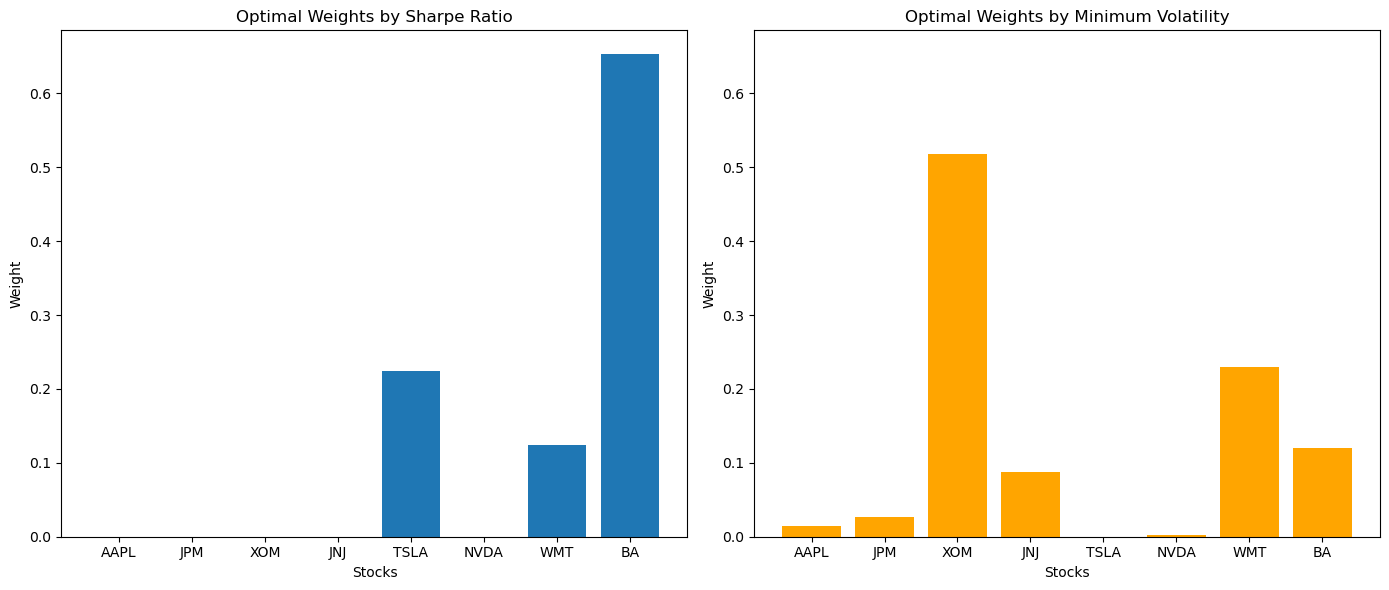

In [66]:
#Plotting optimal weights
plot_optimal_weights(optimal_sharpe.x, optimal_vol.x, tickers)


These bar charts display the composition of two optimal portfolios:

(Left): Portfolio with Maximum Sharpe Ratio
- Focuses on maximizing risk-adjusted returns
- Largest weight is in BA (Boeing) (~65%), followed by smaller weights in TSLA (Tesla) and WMT (Walmart)
- Other stocks inlcuding AAPL and JPM appear to have zero weights indicating that they don't contribute to maximizing the Sharpe ratio in this case

(Right): Portfolio with Minimum Volatility
- Prioritizes minimizing risk regardless of returns
- Largest weight is XOM (ExxonMobil) (~52%) along with meaningul allocations to WMT (Walmart) and BA (Boeing)
- Other stocks have minor or near-zero weights

These charts highlight how portfolio objectives can influence asset location. Maximizing return per unit risk can lead to a concentrated portfolio with high growth potential whilst minimizing risk spreads the weight into traditionally safer assets.

# Conclusion

This analysis demonstrated the process of constructing an efficient portfolio by balancing expected return against risk using historical stock data. The Efficient Frontier clearly highlights the set of optimal portfolios and the optimal weight allocations show how portfolio objectives impact asset distribution.

However, the model relies on several assumptions and limitations. It uses historical returns and covariances, which may not accurately predict future performance. It additionally ignores factors like transaction costs, taxes, and market impact which can affect real-world portfolio implementation. The risk-free rate was also assumed to be zero for simplicity which most likely does not reflect current economic conditions.

For future improvements, the model could be extended by including a broader set of assets for better diversification as well as accounting for transaction costs and incorporating varying risk-free rates. Additionally, exploring alternative optimization techniques or incorporating foward-looking return estimates could enhance portfolio reliability.